In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
most_recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent

('2017-08-23',)

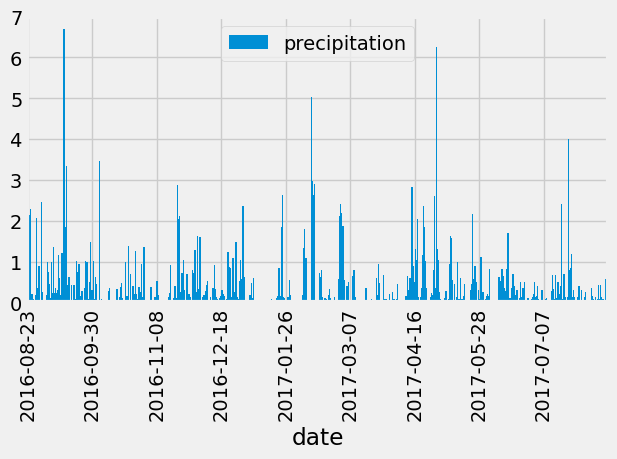

datetime.date(2017, 8, 23)

In [17]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_dt = dt.date(2017, 8, 23)

# Calculate the date one year from the last date in data set.
year_ago_dt = most_recent_dt - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
sel = [Measurement.date, Measurement.prcp]
year_data = session.query(*sel).filter(Measurement.date >= year_ago_dt).order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame
year_data_df = pd.DataFrame(year_data, columns=['date', 'precipitation'])
year_data_df.set_index('date', inplace=True)

# Double-check that the dataframe is sorted by date
sorted_df = year_data_df.sort_values(by='date')
# sorted_df = sorted_df.groupby('date')['precipitation'].sum()

# Use Pandas Plotting with Matplotlib to plot the data
sorted_df.plot.bar(width=5)
plt.locator_params(axis='x', nbins=9)
plt.tight_layout()
plt.ylim(0, 7)
plt.show()

In [58]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary = sorted_df.describe()
print(summary)

       precipitation
count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(func.count(Station.station)).all()
station_count

[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_activity = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station)
station_act_order = station_activity.order_by(func.count(Measurement.station).desc())
most_active = station_act_order.first()[0]
station_act_order.all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel_1 = [func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)]
active_data = session.query(*sel_1).filter(Measurement.station == most_active)
active_data.all()

[(54.0, 85.0, 71.66378066378067)]

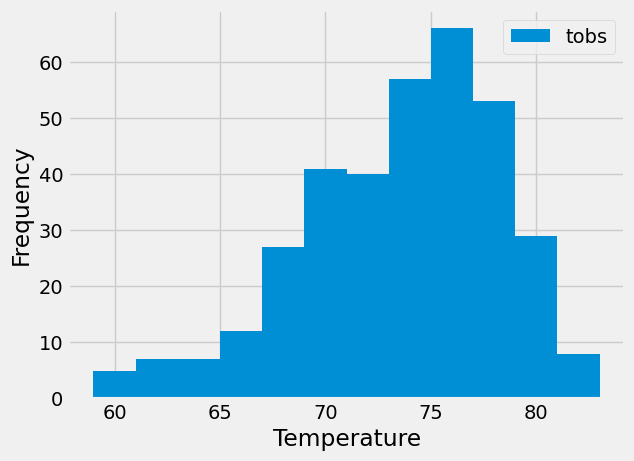

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_tobs_data = session.query(Measurement.tobs).filter(Measurement.date >= year_ago_dt)\
                                                .filter(Measurement.station == most_active)
df = pd.DataFrame(year_tobs_data)
df.plot.hist(bins=12)
plt.xlabel('Temperature')
plt.show()

# Close Session

In [16]:
# Close Session
session.close()

<function datetime.date>